In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
data.drop('Row ID', axis = 1, inplace = True)
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [4]:
data.shape

(9800, 17)

In [5]:
data.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
data.dropna(how='any', inplace=True)

In [7]:
data.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [8]:
data.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst = True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst = True)

In [10]:
data['OrderYear'] = data['Order Date'].dt.year
data['OrderMonth'] = data['Order Date'].dt.month_name()

In [11]:
data['days_for_shipment'] = data['Ship Date'] - data['Order Date']
data['days_for_shipment'] = data['days_for_shipment'].dt.days

In [12]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,OrderYear,OrderMonth,days_for_shipment
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November,3
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November,3
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October,7
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October,7


## Data Analysis

#### 1) Top 5 States with highest Sales

In [13]:
data.groupby('State').agg({'Sales' : sum}).sort_values(['Sales'], ascending = False).head(5)

,Sales
State,
California,446306.4635
New York,306361.1470
Texas,168572.5322
Washington,135206.8500
Pennsylvania,116276.6500


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

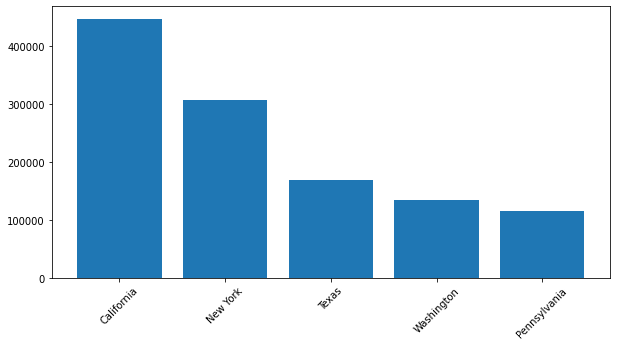

In [14]:
%matplotlib inline
plt.figure(figsize=(10,5))
df = data.groupby('State', as_index=False)['Sales'].agg('sum').sort_values(['Sales'], ascending = False).head(5)
plt.bar(df['State'], df['Sales'])
plt.xticks(rotation=45)

#### 2) Top 3 Sub-categories for each Category in terms of Sales value

In [15]:
cat_sub = data.groupby(['Category', 'Sub-Category']).agg({'Sales':sum})
cat_sub.sort_values(['Sales'], ascending = False).groupby('Category').head(3).sort_index()

Sales
Category        Sub-Category             
Furniture       Bookcases     109408.2987
                Chairs        322107.5310
                Tables        202810.6280
Office Supplies Appliances    104075.4630
                Binders       200028.7850
                Storage       217779.1020
Technology      Accessories   163881.6900
                Machines      189238.6310
                Phones        326487.6980

#### 3) Best Month for Sales and total earned that month

In [16]:
data.groupby('OrderMonth')['Sales'].agg(['sum','min','max']).sort_values(['sum'], ascending=False)

,sum,min,max
OrderMonth,,,
November,345041.6110,1.192,10499.970
December,321275.1395,1.167,9892.740
September,300103.4117,0.876,9449.950
October,199496.2947,0.898,17499.950
March,197573.5872,0.556,22638.480
August,157315.9270,1.362,4416.174
May,154086.7237,1.188,8399.976
June,145837.5233,0.444,4476.800
July,145535.6890,1.044,8187.650


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

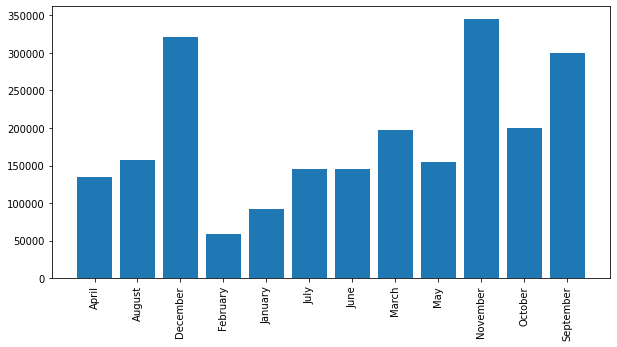

In [17]:
plt.figure(figsize=(10,5))
df = data.groupby(['OrderMonth'], as_index=False)['Sales'].agg('sum')
plt.bar(df['OrderMonth'], df['Sales'])
plt.xticks(rotation=90)

In month of 'November', maximum sales occurred for the store, while 'February' month showed the least sales

#### 4) What city sold the most products?

In [18]:
data.groupby(['City'], as_index=False)['Order ID'].nunique().sort_values(['Order ID'], ascending=False).head(5)

,City,Order ID
327,New York City,439
265,Los Angeles,378
372,Philadelphia,262
436,San Francisco,261
450,Seattle,210


#### 5) Month & City with highest number of "late deliveries"

In [19]:
# Assuming Late deliveries to be the Max no. of days taken by any order to ship
max_days = data[data['days_for_shipment'] == data['days_for_shipment'].max()]
max_days.groupby(['OrderMonth']).agg({'days_for_shipment':'count'}).sort_values(['days_for_shipment'], ascending=False).head(5)

,days_for_shipment
OrderMonth,
December,98
November,87
August,86
September,66
April,49


In [20]:
max_days.groupby(['City']).agg({'days_for_shipment':'count'}).sort_values(['days_for_shipment'], ascending=False).head(5)

,days_for_shipment
City,
Los Angeles,68
Seattle,52
New York City,48
Houston,25
Philadelphia,25


Highest number of late deliveries occurred in month of December and in Los Angeles

#### 6) Month and City with highest number of "Same-Day" deliveries

In [21]:
print('Total Same-Day deliveries are: {}'.format(data[data['Ship Mode'] == 'Same Day']['Ship Mode'].count())),
print('Total deliveries with same-day shipment: {}'.format(data[data['days_for_shipment'] == 0]['days_for_shipment'].count()))

Total Same-Day deliveries are: 538
Total deliveries with same-day shipment: 514


##### Rest 24 Same-day deliveries have been shipped 1 day after the Ordered date

In [22]:
data[(data['days_for_shipment'] != 0) & (data['Ship Mode'] == 'Same Day')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,OrderYear,OrderMonth,days_for_shipment
1473,US-2016-105676,2016-12-01,2016-12-02,Same Day,NM-18520,Neoma Murray,Consumer,United States,Houston,Texas,77036.0,Central,FUR-FU-10004270,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",6.688,2016,December,1
2348,CA-2018-109701,2018-12-02,2018-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,California,90032.0,West,OFF-BI-10004187,Office Supplies,Binders,3-ring staple pack,9.024,2018,December,1
2349,CA-2018-109701,2018-12-02,2018-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,California,90032.0,West,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,69.456,2018,December,1
2350,CA-2018-109701,2018-12-02,2018-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,California,90032.0,West,OFF-PA-10003724,Office Supplies,Paper,"Wirebound Message Book, 4 per Page",10.860,2018,December,1
2351,CA-2018-109701,2018-12-02,2018-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,California,90032.0,West,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,79.470,2018,December,1
2352,CA-2018-109701,2018-12-02,2018-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,California,90032.0,West,OFF-AR-10001868,Office Supplies,Art,Prang Dustless Chalk Sticks,10.080,2018,December,1
3041,CA-2018-149559,2018-09-11,2018-09-12,Same Day,KF-16285,Karen Ferguson,Home Office,United States,Long Beach,California,90805.0,West,OFF-PA-10003172,Office Supplies,Paper,Xerox 1996,12.960,2018,September,1
3042,CA-2018-149559,2018-09-11,2018-09-12,Same Day,KF-16285,Karen Ferguson,Home Office,United States,Long Beach,California,90805.0,West,OFF-EN-10002312,Office Supplies,Envelopes,#10 Self-Seal White Envelopes,22.180,2018,September,1
3043,CA-2018-149559,2018-09-11,2018-09-12,Same Day,KF-16285,Karen Ferguson,Home Office,United States,Long Beach,California,90805.0,West,FUR-CH-10002320,Furniture,Chairs,Hon Pagoda Stacking Chairs,2054.272,2018,September,1
3440,CA-2016-144099,2016-11-29,2016-11-30,Same Day,PO-19195,Phillina Ober,Home Office,United States,San Francisco,California,94122.0,West,OFF-BI-10001078,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",4.304,2016,November,1


##### Hence, to calculate the month-wise same day deliveries, we will use the the data with 0 day shipment which is the true Same-Day delivery

In [23]:
min_days = data[data['days_for_shipment'] == data['days_for_shipment'].min()]
min_days.groupby(['OrderMonth']).agg({'days_for_shipment':'count'}).sort_values(['days_for_shipment'], ascending=False).head(5)

,days_for_shipment
OrderMonth,
September,79
November,71
December,66
October,63
March,53


In [24]:
min_days.groupby(['City']).agg({'days_for_shipment':'count'}).sort_values(['days_for_shipment'], ascending=False).head(5)

,days_for_shipment
City,
New York City,52
San Francisco,37
Seattle,34
Columbus,23
Los Angeles,23


Highest number of same-day deliveries occurred in month of September and in New York City

#### (7) Which products are most often sold together

In [25]:
data['Product Name'] = data['Product Name'].str.replace(',','')

In [26]:
#Take only OrderID's that have atleast 2 items ordered on same OrderID
dataset = data[data['Order ID'].duplicated(keep=False)]

In [27]:
#Group the Product names together having same OrderIDs separated by comma
dataset['grouped'] = dataset.groupby(['Order ID'])['Product Name'].transform(lambda x : ','.join(x))

In [28]:
dataset['grouped']

0       Bush Somerset Collection Bookcase,Hon Deluxe F...
1       Bush Somerset Collection Bookcase,Hon Deluxe F...
3       Bretford CR4500 Series Slim Rectangular Table,...
4       Bretford CR4500 Series Slim Rectangular Table,...
5       Eldon Expressions Wood and Plastic Desk Access...
                              ...                        
9794    Staple envelope,Global Deluxe Steno Chair,Adam...
9796    BIC Brite Liner Highlighters Chisel Tip,GE 305...
9797    BIC Brite Liner Highlighters Chisel Tip,GE 305...
9798    BIC Brite Liner Highlighters Chisel Tip,GE 305...
9799    BIC Brite Liner Highlighters Chisel Tip,GE 305...
Name: grouped, Length: 7294, dtype: object

In [29]:
#Remove the duplicated Grouped names
dataset = dataset[['Order ID', 'grouped']].drop_duplicates()
dataset.head()

,Order ID,grouped
0,CA-2017-152156,"Bush Somerset Collection Bookcase,Hon Deluxe F..."
3,US-2016-108966,"Bretford CR4500 Series Slim Rectangular Table,..."
5,CA-2015-115812,Eldon Expressions Wood and Plastic Desk Access...
14,US-2016-118983,Holmes Replacement Filter for HEPA Air Cleaner...
18,CA-2015-143336,"Newell 341,Cisco SPA 501G IP Phone,Wilson Jone..."


In [30]:
#To count the number of these unique pairs in the whole dataset - gives Products most often sold together
from itertools import combinations
from collections import Counter

def itemCombination(num):
    count = Counter()

    for row in dataset['grouped']:
        #transforming each row into a List
        row_list = row.split(',')
        count.update(Counter(combinations(row_list,num)))

    #Get Top 3 most sold Combination of items
    return count.most_common(3)

In [31]:
#Top 3 Combination of '5' item pairs and their respective count in the dataset
itemCombination(5)

[(('Newell 344',
   'Memorex Micro Travel Drive 16 GB',
   'Wirebound Four 2-3/4 x 5 Forms per Page 400 Sets per Book',
   'Elite 5" Scissors',
   'Staple-based wall hangings'),
  2),
 (('Newell 344',
   'Memorex Micro Travel Drive 16 GB',
   'Wirebound Four 2-3/4 x 5 Forms per Page 400 Sets per Book',
   'Elite 5" Scissors',
   'Eldon Image Series Desk Accessories Burgundy'),
  2),
 (('Newell 344',
   'Memorex Micro Travel Drive 16 GB',
   'Wirebound Four 2-3/4 x 5 Forms per Page 400 Sets per Book',
   'Elite 5" Scissors',
   'DAX Two-Tone Silver Metal Document Frame'),
  2)]

This can be very useful for the marketing the products and products can be sold in a pair of these groups as they are most popular

#### 8) Most popular product that was sold the most

In [32]:
popular_prod = data.groupby(['Product Name'], as_index=False)['Product ID'].count().sort_values(['Product ID'], ascending=False)
popular_prod.rename({'Product Name':'Product', 'Product ID':'Quantity'}, axis=1, inplace=True)
popular_prod.head(5)

,Product,Quantity
1491,Staple envelope,47
1497,Staples,46
536,Easy-staple paper,44
258,Avery Non-Stick Binders,20
1494,Staple remover,18


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

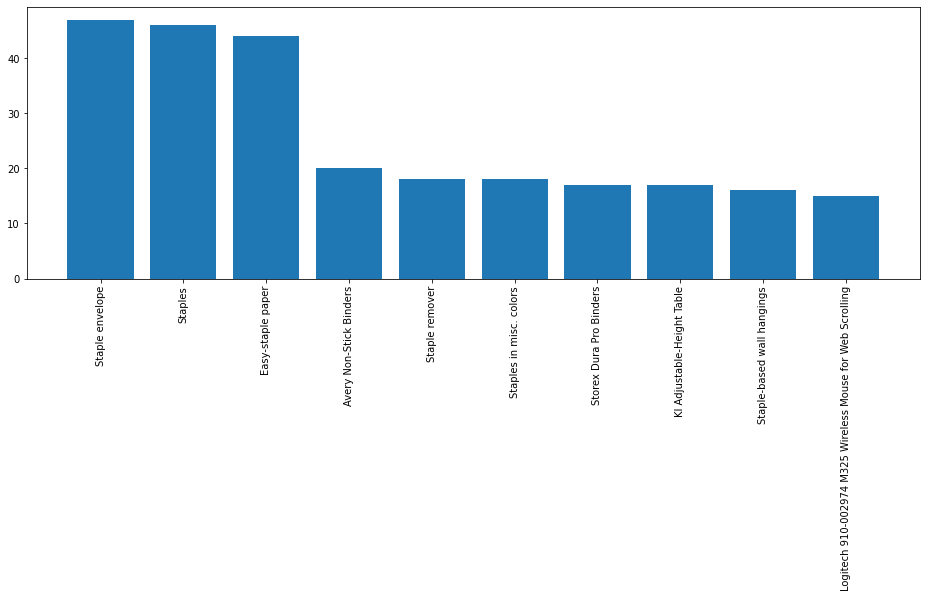

In [33]:
plt.figure(figsize=(16,5))
df = popular_prod.head(10)
plt.bar(df['Product'], df['Quantity'])
plt.xticks(rotation=90)

This tells that Staples and Binders are the most popular products to be sold at stores

But do these popular products really help generate maximum revenues for the store? Let's see

#### (9) Product generating maximum Revenue

In [34]:
popular_prod = data.groupby(['Product Name'], as_index=False)['Sales'].agg(['sum', 'count','mean']).sort_values(['sum'], ascending=False)
popular_prod.rename({'Product Name':'Product', 'sum':'Total Revenue', 'count':'Quantity'}, axis=1, inplace=True)
popular_prod.head(5)

,Total Revenue,Quantity,mean
Product Name,,,
Canon imageCLASS 2200 Advanced Copier,61599.824,5,12319.964800
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,10,2745.338400
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,1,22638.480000
HON 5400 Series Task Chairs for Big and Tall,21870.576,8,2733.822000
GBC DocuBind TL300 Electric Binding System,19823.479,11,1802.134455


In [35]:
# Costliest Product
data[data['Sales'] == data['Sales'].max()][['Product Name', 'Sales']]

,Product Name,Sales
2697,Cisco TelePresence System EX90 Videoconferenci...,22638.48


#### (10) Calculate percent-contribution in total sales of each order by their member products

In [36]:
data['Total Order Sales'] = data.groupby(['Order ID'])['Sales'].transform(sum)

In [37]:
dataset = data[['Order ID', 'Product Name', 'Sales', 'Total Order Sales']]
dataset['Percent of Total'] = (dataset['Sales']/dataset['Total Order Sales'])*100
dataset

,Order ID,Product Name,Sales,Total Order Sales,Percent of Total
0,CA-2017-152156,Bush Somerset Collection Bookcase,261.9600,993.9000,26.356776
1,CA-2017-152156,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,993.9000,73.643224
2,CA-2017-138688,Self-Adhesive Address Labels for Typewriters b...,14.6200,14.6200,100.000000
3,US-2016-108966,Bretford CR4500 Series Slim Rectangular Table,957.5775,979.9455,97.717424
4,US-2016-108966,Eldon Fold 'N Roll Cart System,22.3680,979.9455,2.282576
...,...,...,...,...,...
9795,CA-2017-125920,Cardinal HOLDit! Binder Insert StripsExtra Strips,3.7980,3.7980,100.000000
9796,CA-2016-128608,BIC Brite Liner Highlighters Chisel Tip,10.3680,282.3160,3.672480
9797,CA-2016-128608,GE 30524EE4,235.1880,282.3160,83.306649
9798,CA-2016-128608,Anker 24W Portable Micro USB Car Charger,26.3760,282.3160,9.342722


This is very useful to identify any product in the order that contributed the highest percent in the total sales of that order.

#### 11) Timely vs Delayed orders

Taking orders taking more than 5 days to ship as 'Delayed' orders and rest as 'Timely' orders 

In [38]:
data['is_delayed'] = np.where(data['days_for_shipment'] >= 5, 'True', 'False')

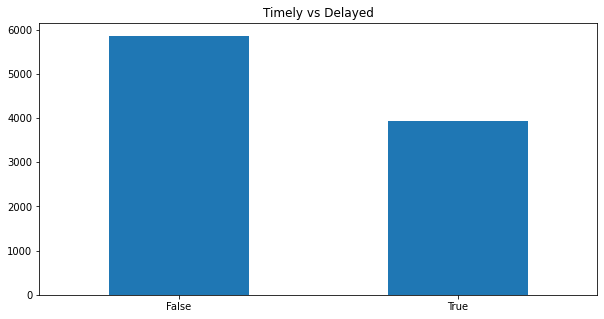

In [39]:
plt.figure(figsize=(10,5))
data['is_delayed'].value_counts().plot(kind = 'bar',title = 'Timely vs Delayed',rot = 0)

In [40]:
filter_table = data.pivot_table(index='Region', columns='is_delayed', values='Sales', aggfunc='count', margins=True)
filter_table.rename({'False':'NotDelayed', 'True':'Delayed', 'All':'TotalOrders'}, axis=1, inplace=True)
filter_table['Timely_proportion'] = round((filter_table['NotDelayed']/filter_table['TotalOrders'])*100,2)
filter_table['Delayed_proportion'] = round((filter_table['Delayed']/filter_table['TotalOrders'])*100,2)
filter_table

is_delayed,NotDelayed,Delayed,TotalOrders,Timely_proportion,Delayed_proportion
Region,,,,,
Central,1326,951,2277,58.23,41.77
East,1701,1073,2774,61.32,38.68
South,958,640,1598,59.95,40.05
West,1873,1267,3140,59.65,40.35
All,5858,3931,9789,59.84,40.16


Max percentage of 'Delayed' orders has been from the 'Central' region, while minimum proportion of dalayed orders occurred in 'East' Region

In [41]:
filter_table = data.pivot_table(index='Ship Mode', columns='is_delayed', values='Sales', aggfunc='count', margins=True)
filter_table.rename({'False':'NotDelayed', 'True':'Delayed', 'All':'TotalOrders'}, axis=1, inplace=True)
filter_table['Timely_proportion'] = round((filter_table['NotDelayed']/filter_table['TotalOrders'])*100,2)
filter_table['Delayed_proportion'] = round((filter_table['Delayed']/filter_table['TotalOrders'])*100,2)
filter_table

is_delayed,NotDelayed,Delayed,TotalOrders,Timely_proportion,Delayed_proportion
Ship Mode,,,,,
First Class,1501.0,NaN,1501,100.00,NaN
Same Day,538.0,NaN,538,100.00,NaN
Second Class,1478.0,423.0,1901,77.75,22.25
Standard Class,2341.0,3508.0,5849,40.02,59.98
All,5858.0,3931.0,9789,59.84,40.16


For 'First Class' and 'Same-Day' Deliveries, none of the orders have been delayed, this can be one of the reasons why the cost of these shipping modes is costlier than other modes, since for faster service people often agree to pay more.

#### 12) Customer analysis

In [42]:
first_purchase = data.sort_values(by='Order Date').groupby('Customer ID').first()
last_purchase = data.sort_values(by='Order Date').groupby('Customer ID').last()

In [43]:
customer = pd.merge(first_purchase, last_purchase, on='Customer ID')[['State_x','Order Date_x','Order Date_y']]
customer.rename({'State_x':'State', 'Order Date_x':'First_Purchase', 'Order Date_y':'Last_Purchase'}, axis=1, inplace=True)
customer.head()

,State,First_Purchase,Last_Purchase
Customer ID,,,
AA-10315,California,2015-03-31,2018-06-29
AA-10375,California,2015-04-21,2018-12-11
AA-10480,Connecticut,2015-05-04,2018-04-15
AA-10645,Pennsylvania,2015-06-22,2018-11-05
AB-10015,Texas,2015-02-18,2017-11-10


In [44]:
customer['Retention_Days'] = customer['Last_Purchase'] - customer['First_Purchase']
customer['Retention_Days'] = customer['Retention_Days'].dt.days
customer['Count_of_Orders'] = data.groupby('Customer ID')['Sales'].count()
customer['Freq_of_Orders'] = round(customer['Retention_Days']/customer['Count_of_Orders'],0)
customer['Avg_Revenue_per_order'] = data.groupby('Customer ID')['Sales'].mean()
customer.head()

,State,First_Purchase,Last_Purchase,Retention_Days,Count_of_Orders,Freq_of_Orders,Avg_Revenue_per_order
Customer ID,,,,,,,
AA-10315,California,2015-03-31,2018-06-29,1186,11,108.0,505.778182
AA-10375,California,2015-04-21,2018-12-11,1330,15,89.0,70.426000
AA-10480,Connecticut,2015-05-04,2018-04-15,1077,12,90.0,149.209333
AA-10645,Pennsylvania,2015-06-22,2018-11-05,1232,18,68.0,282.607500
AB-10015,Texas,2015-02-18,2017-11-10,996,6,166.0,147.692667


In [45]:
#5 Most profitable customers 
customer.sort_values(by='Avg_Revenue_per_order', ascending=False).head()

,State,First_Purchase,Last_Purchase,Retention_Days,Count_of_Orders,Freq_of_Orders,Avg_Revenue_per_order
Customer ID,,,,,,,
MW-18235,Virginia,2015-05-21,2018-11-16,1275,3,425.0,1751.292000
SM-20320,Florida,2015-03-18,2018-10-12,1304,15,87.0,1669.536667
TC-20980,Texas,2015-11-07,2017-11-26,750,12,62.0,1587.684833
GT-14635,New York,2015-06-06,2018-11-04,1247,6,208.0,1558.535333
TA-21385,Kansas,2015-09-12,2018-10-22,1136,10,114.0,1459.562000


In [46]:
#Top 3 Most Loyal Customers
customer[(customer['Retention_Days'] > 1095) & (customer['Freq_of_Orders'] < 40) & (customer['Avg_Revenue_per_order'] > 150)]

,State,First_Purchase,Last_Purchase,Retention_Days,Count_of_Orders,Freq_of_Orders,Avg_Revenue_per_order
Customer ID,,,,,,,
PP-18955,Delaware,2015-08-26,2018-09-24,1125,34,33.0,213.312000
WB-21850,California,2015-11-04,2018-12-10,1132,35,32.0,175.134571
ZC-21910,Washington,2015-10-13,2018-11-06,1120,31,36.0,258.893774


If the store owner wants to award its 3 most loyal customers with a discount coupon, he can find them through this.

These are the 3 most loyal customers of the store acc to given data, who have been purchasing constantly at the store for last 3yrs(Retention) with an approx 'avg order freq' of once every month and also generating decent per order revenue for the store.

In [47]:
#Top 5 states where loyal customers are distributed
loyal_states = customer[(customer['Retention_Days'] > 365) & (customer['Freq_of_Orders'] < 90) & (customer['Avg_Revenue_per_order'] > 100)]
loyal_states = loyal_states.groupby(['State']).agg({'Avg_Revenue_per_order':'count'}).rename({'Avg_Revenue_per_order':'Count'},axis=1)
loyal_states.sort_values('Count', ascending=False).head()

,Count
State,
California,65
Texas,41
New York,36
Washington,21
Pennsylvania,17


If the owner wants to expand the Super-store chain further in some states, how can he find those important states.

Considering Loyal customers stay with the store for atleast 1 year with a frequency of shopping every 3 months and generating atleast $100 revenue per order for the store, 
the owner can decide to expand its stores chain in these 5 states, with 'California' being the safest bet.